<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Hands-on%20ML/chapter11/Batch_Normalisation_and_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [6]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [7]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2475 - accuracy: 0.9249 - val_loss: 0.6180 - val_accuracy: 0.9615
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1153 - accuracy: 0.9656 - val_loss: 0.5939 - val_accuracy: 0.9673
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0855 - accuracy: 0.9747 - val_loss: 0.6137 - val_accuracy: 0.9682
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0671 - accuracy: 0.9784 - val_loss: 1.2358 - val_accuracy: 0.9711
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0559 - accuracy: 0.9820 - val_loss: 1.8991 - val_accuracy: 0.9717
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0495 - accuracy: 0.9845 - val_loss: 0.8888 - val_accuracy: 0.9739
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 1.0869 - val_accuracy:

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9404 - accuracy: 0.9762


[0.9404024481773376, 0.9761999845504761]

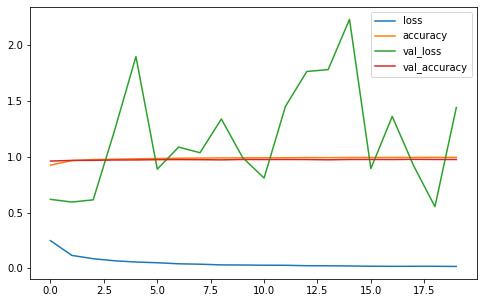

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(128, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100352    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16384     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

In [11]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hisotry = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3012 - accuracy: 0.9096 - val_loss: 0.2324 - val_accuracy: 0.9488
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1685 - accuracy: 0.9491 - val_loss: 0.2004 - val_accuracy: 0.9582
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1310 - accuracy: 0.9600 - val_loss: 0.2645 - val_accuracy: 0.9629
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1088 - accuracy: 0.9664 - val_loss: 0.2467 - val_accuracy: 0.9629
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0925 - accuracy: 0.9720 - val_loss: 0.2311 - val_accuracy: 0.9661
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.3108 - val_accuracy: 0.9636
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.2909 - val_accuracy:

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.9686


[0.442717581987381, 0.9685999751091003]

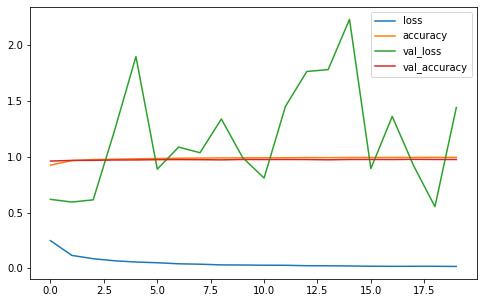

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [14]:
x_train = x_train/255.
x_test = x_test/255.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2482 - accuracy: 0.9258 - val_loss: 0.1333 - val_accuracy: 0.9596
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1097 - accuracy: 0.9666 - val_loss: 0.1161 - val_accuracy: 0.9686
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0798 - accuracy: 0.9764 - val_loss: 0.1139 - val_accuracy: 0.9703
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9808 - val_loss: 0.1092 - val_accuracy: 0.9737
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0550 - accuracy: 0.9850 - val_loss: 0.1124 - val_accuracy: 0.9726
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0444 - accuracy: 0.9874 - val_loss: 0.1176 - val_accuracy: 0.9730
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0415 - accuracy: 0.9884 - val_loss: 0.1134 - val_accuracy:

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9746


[0.24081891775131226, 0.9746000170707703]